Adv EDA + Regression (problem statement)
Objective:
To conduct a comprehensive Exploratory Data Analysis (EDA) and build a Linear Regression model to predict app ratings on the Google Play Store using two datasets: googleplaystore.csv and 
googleplaystore_user_reviews.csv.

In [273]:
#Importing expected libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.preprocessing import LabelEncoder


In [136]:
#loading dataset 
googleplaystore=pd.read_csv(r"C:\Users\HP.Com\Desktop\HAMZA\advanced_projects_working\adv_eda_and_regression_root\dataset\googleplaystore.csv")
googleplaystore_user_reviews=pd.read_csv(r"C:\Users\HP.Com\Desktop\HAMZA\advanced_projects_working\adv_eda_and_regression_root\dataset\googleplaystore_user_reviews.csv")


In [137]:
#exploring the dataset
googleplaystore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [138]:
#checking duplicates
googleplaystore.duplicated().sum()
#dropping duplicates
googleplaystore.drop_duplicates(inplace=True)

In [139]:
# checking for na values
googleplaystore.isna().sum()
# dropping na values 
googleplaystore.dropna(inplace=True)

In [140]:
# changing datatype from string to int64
googleplaystore['Reviews'] = googleplaystore['Reviews'].astype('int64')
#renaming the column from size to size_in_bytes
googleplaystore.rename(columns={'Size':'Size_in_bytes'},inplace=True)


In [142]:
def convert_size(size_str):
    if 'M' in size_str:
        # Convert megabytes to bytes
        return float(size_str.replace('M', '')) * 1e6
    elif 'k' in size_str:
        # Convert kilobytes to bytes
        return float(size_str.replace('k', '')) * 1e3
    elif 'Varies with device' in size_str:
        # Replace "Varies with device" with NaN
        return np.nan
    else:
        # Size is already in bytes or other unit
        return float(size_str)

# Apply the function to the 'Size' column
googleplaystore['Size_in_bytes'] = googleplaystore['Size_in_bytes'].apply(convert_size)


In [147]:
# dropping nan values 
googleplaystore.dropna(inplace=True)

In [157]:
#functions to replace '+' sign and ',' from the entries 
def replacing(install_values):
    if "+" in install_values:
        return install_values.replace("+", "")
    else: 
        return install_values
googleplaystore['Installs']= googleplaystore['Installs'].apply(replacing)

def change(install_values):
    if "," in install_values:
        return install_values.replace(",", "")
    else: 
        return install_values
googleplaystore['Installs']= googleplaystore['Installs'].apply(change)
#changing its datatype to int64 now 
googleplaystore['Installs'] = googleplaystore['Installs'].astype('int64')


In [165]:
#function to replace '$' sign from my price column
def replacement(pricing):
    if "$" in pricing:
        return pricing.replace("$", "")
    else: 
        return pricing
googleplaystore['Price']= googleplaystore['Price'].apply(replacement)
#renaming the column name from price to price_in_dollars
googleplaystore.rename(columns={'Price':'Price_in_$'},inplace=True)
#converting the type of price column to int
googleplaystore['Price_in_$'] = googleplaystore['Price_in_$'].astype('float')

In [172]:
#changing the datatype of last updated from object to datetime
googleplaystore['Last Updated'] = pd.to_datetime(googleplaystore['Last Updated'], format='%B %d, %Y')


In [182]:
# Taking the left string from 'Genres' column 
googleplaystore['Genres'] = googleplaystore['Genres'].str.split(';').str.get(0)

In [209]:
googleplaystore_user_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


In [214]:
googleplaystore_user_reviews.dropna(inplace=True)

In [217]:
googleplaystore_user_reviews.duplicated().sum()

7735

In [218]:
googleplaystore_user_reviews.drop_duplicates(inplace=True)

In [220]:
googleplaystore_user_reviews.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29692 entries, 0 to 64230
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     29692 non-null  object 
 1   Translated_Review       29692 non-null  object 
 2   Sentiment               29692 non-null  object 
 3   Sentiment_Polarity      29692 non-null  float64
 4   Sentiment_Subjectivity  29692 non-null  float64
dtypes: float64(2), object(3)
memory usage: 1.4+ MB


In [299]:
googleplaystore.tail()

,App,Category,Rating,Reviews,Size_in_bytes,Installs,Type,Price_in_$,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10833,Chemin (fr),BOOKS_AND_REFERENCE,4.8,44,619000.0,1000,Free,0.0,Everyone,Books & Reference,2014-03-23,0.8,2.2 and up
10834,FR Calculator,FAMILY,4.0,7,2600000.0,500,Free,0.0,Everyone,Education,2017-06-18,1.0.0,4.1 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53000000.0,5000,Free,0.0,Everyone,Education,2017-07-25,1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3600000.0,100,Free,0.0,Everyone,Education,2018-07-06,1.0,4.1 and up
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19000000.0,10000000,Free,0.0,Everyone,Lifestyle,2018-07-25,Varies with device,Varies with device


In [223]:
merged_df = googleplaystore.merge(googleplaystore_user_reviews, how='left', on='App')


In [226]:
merged_df.dropna(inplace=True)

EXPLORATORY DATA ANALYSIS 


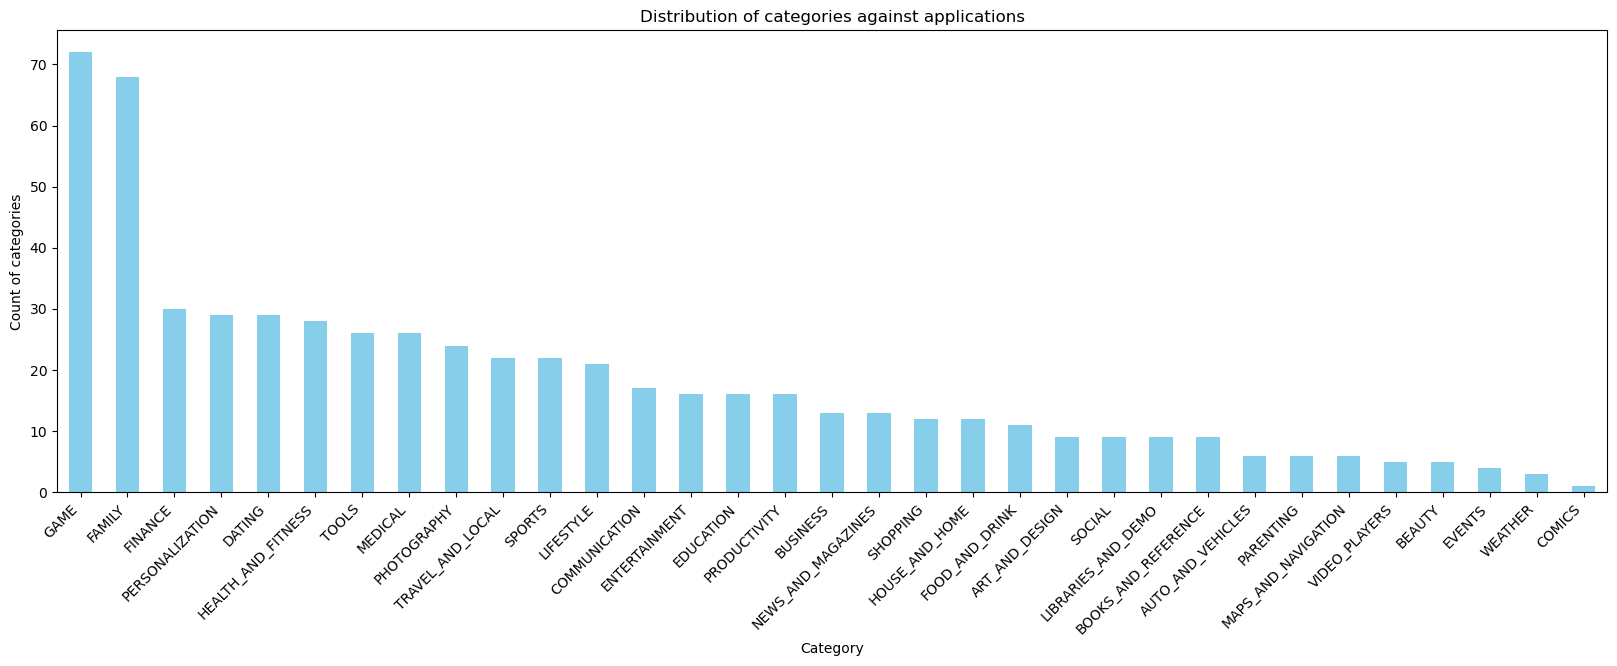

In [247]:
# Drop duplicated entries based on both 'App' and 'Category'
unique_apps_df = merged_df.drop_duplicates(subset=['App', 'Category'])

# Plot the distribution of unique applications across categories
plt.figure(figsize=(20, 6))
unique_apps_df['Category'].value_counts().plot(kind='bar', color='skyblue')
plt.xlabel('Category')
plt.ylabel('Count of categories')
plt.title('Distribution of categories against applications')
plt.xticks(rotation=45, ha='right')  # Adjust rotation for better visibility of category names
plt.show()


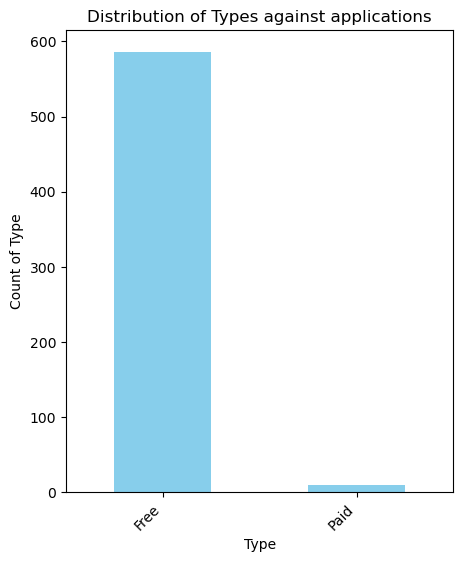

In [251]:
# Drop duplicated entries based on both 'App' and 'Category'
unique_df_paid_or_free = merged_df.drop_duplicates(subset=['App', 'Type'])

# Plot the distribution of unique applications across categories
plt.figure(figsize=(5, 6))
unique_apps_df['Type'].value_counts().plot(kind='bar', color='skyblue')
plt.xlabel('Type')
plt.ylabel('Count of Type')
plt.title('Distribution of Types against applications')
plt.xticks(rotation=45, ha='right')  # Adjust rotation for better visibility of category names
plt.show()

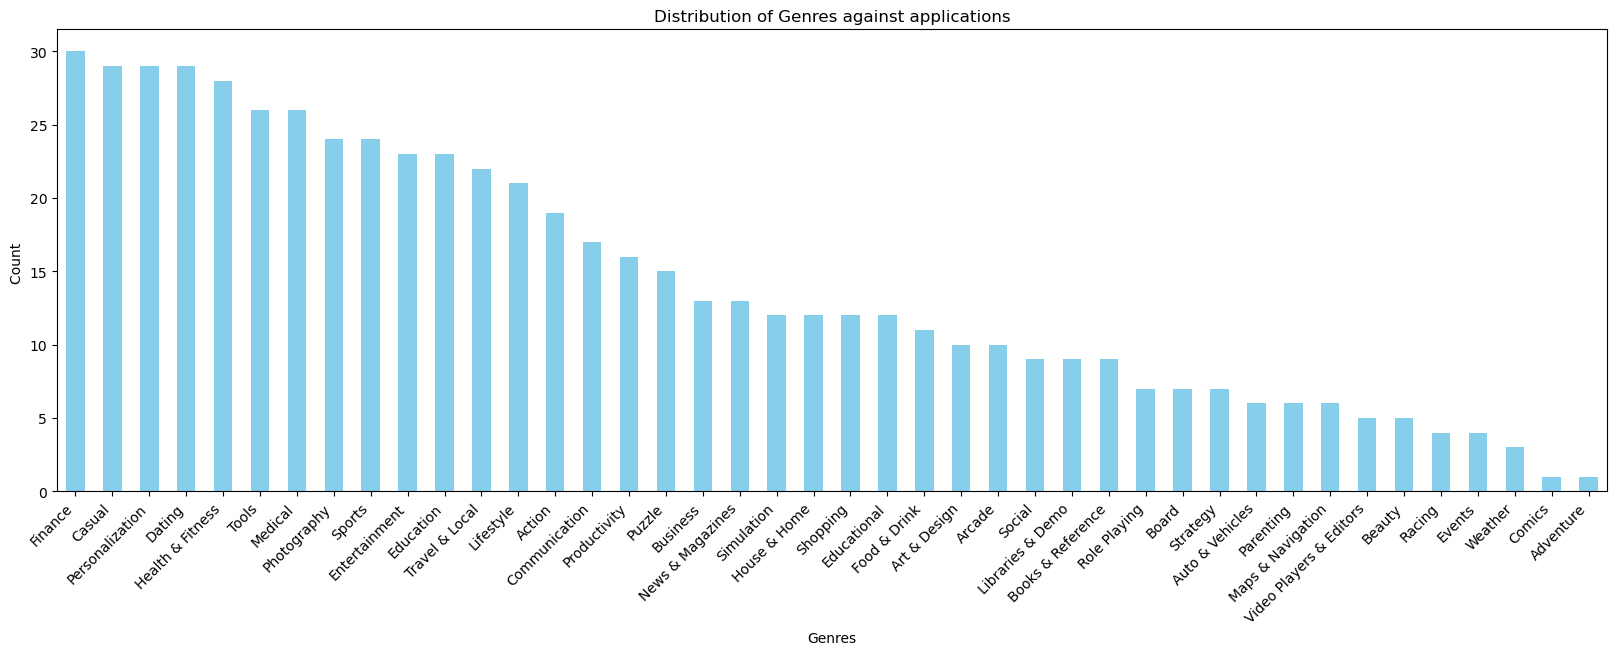

In [255]:
# Drop duplicated entries based on both 'App' and 'Category'
unique_genres = merged_df.drop_duplicates(subset=['App', 'Genres'])

# Plot the distribution of unique applications across categories
plt.figure(figsize=(20, 6))
unique_apps_df['Genres'].value_counts().plot(kind='bar', color='skyblue')
plt.xlabel('Genres')
plt.ylabel('Count ')
plt.title('Distribution of Genres against applications')
plt.xticks(rotation=45, ha='right')  # Adjust rotation for better visibility of category names
plt.show()

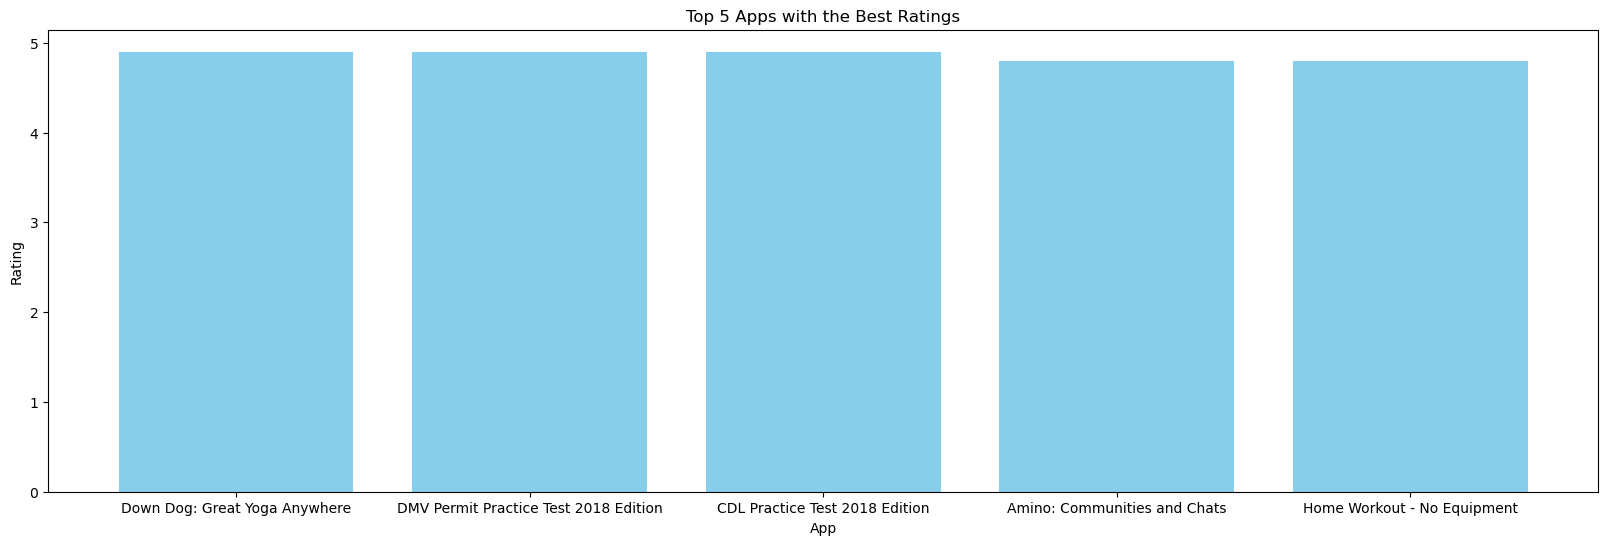

In [261]:
sorted_df = merged_df.sort_values(by='Rating', ascending=False)
unique_df= sorted_df.drop_duplicates(subset=['App','Rating'])
# Select the top 5 rows
top_5_apps = unique_df.head(5)
# Plot the top 5 apps with the best ratings
plt.figure(figsize=(20, 6))
plt.bar(top_5_apps['App'], top_5_apps['Rating'], color='skyblue')
plt.xlabel('App')
plt.ylabel('Rating')
plt.title('Top 5 Apps with the Best Ratings')
plt.show()


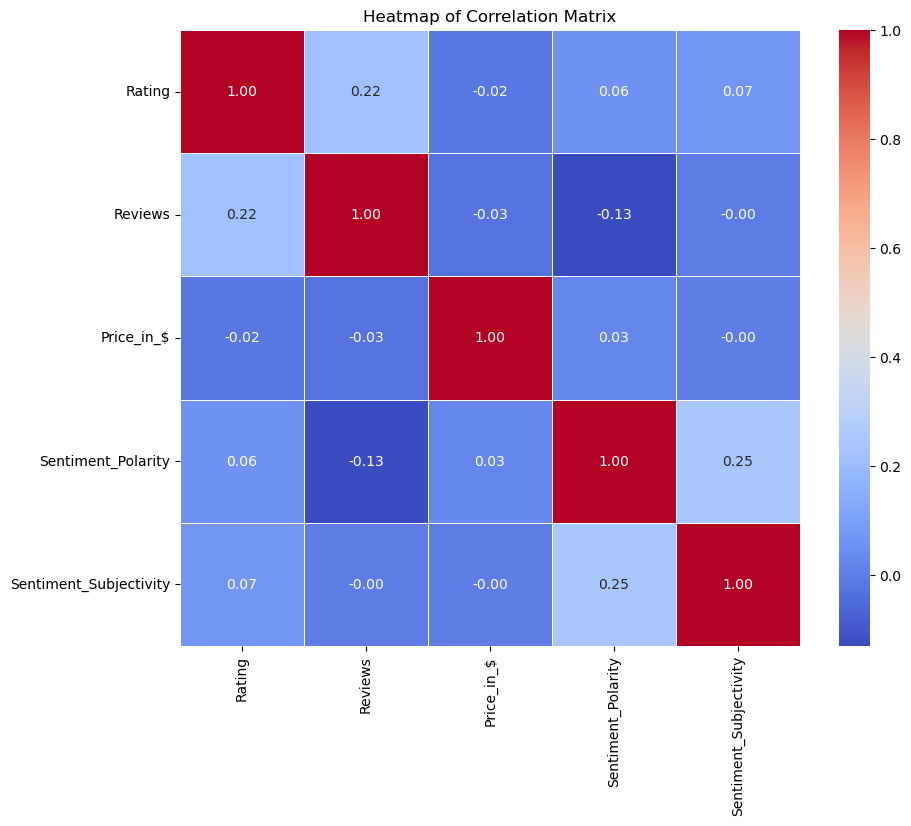

In [269]:
# Heatmap
heatmap_data=merged_df[['Rating','Reviews','Price_in_$','Sentiment_Polarity','Sentiment_Subjectivity']]
plt.figure(figsize=(10,8))
heatmap =sns.heatmap(heatmap_data.corr(),annot=True,cmap='coolwarm',fmt='.2f', linewidths=.5)
plt.title('Heatmap of Correlation Matrix')
plt.show()


In [262]:
merged_df.head()

,App,Category,Rating,Reviews,Size_in_bytes,Installs,Type,Price_in_$,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000000.0,500000,Free,0.0,Everyone,Art & Design,2018-01-15,2.0.0,4.0.3 and up,A kid's excessive ads. The types ads allowed a...,Negative,-0.250,1.000000
2,Coloring book moana,ART_AND_DESIGN,3.9,967,14000000.0,500000,Free,0.0,Everyone,Art & Design,2018-01-15,2.0.0,4.0.3 and up,It bad >:(,Negative,-0.725,0.833333
3,Coloring book moana,ART_AND_DESIGN,3.9,967,14000000.0,500000,Free,0.0,Everyone,Art & Design,2018-01-15,2.0.0,4.0.3 and up,like,Neutral,0.000,0.000000
4,Coloring book moana,ART_AND_DESIGN,3.9,967,14000000.0,500000,Free,0.0,Everyone,Art & Design,2018-01-15,2.0.0,4.0.3 and up,I love colors inspyering,Positive,0.500,0.600000
5,Coloring book moana,ART_AND_DESIGN,3.9,967,14000000.0,500000,Free,0.0,Everyone,Art & Design,2018-01-15,2.0.0,4.0.3 and up,I hate,Negative,-0.800,0.900000


In [274]:
# using label encoding to encode the categorical data
label_encoder = LabelEncoder()
merged_df['Content Rating'] = label_encoder.fit_transform(merged_df['Content Rating'])
merged_df['Sentiment'] = label_encoder.fit_transform(merged_df['Sentiment'])
merged_df['Type'] = label_encoder.fit_transform(merged_df['Type'])



In [279]:
# training_data
X=merged_df.drop(['App', 'Category', 'Rating',
        'Content Rating', 'Genres', 'Last Updated',
       'Current Ver', 'Android Ver', 'Translated_Review'],axis=1)

In [285]:
#testing_data
y=merged_df[['Rating']]

In [287]:
# Train - Test split 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)


Training set shape: (21188, 8) (21188, 1)
Testing set shape: (5297, 8) (5297, 1)


In [ ]:
from sklearn.linear_model import LinearRegression

# Creating a linear regression model
model = LinearRegression()

# Training the model on the training set
model.fit(X_train, y_train)


In [292]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# Make predictions on the testing set
y_pred = model.predict(X_test)
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
# Print the evaluation metrics
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)


Mean Squared Error: 0.08238170074413083
Mean Absolute Error: 0.20654559341395934
R-squared: 0.07200430173465044


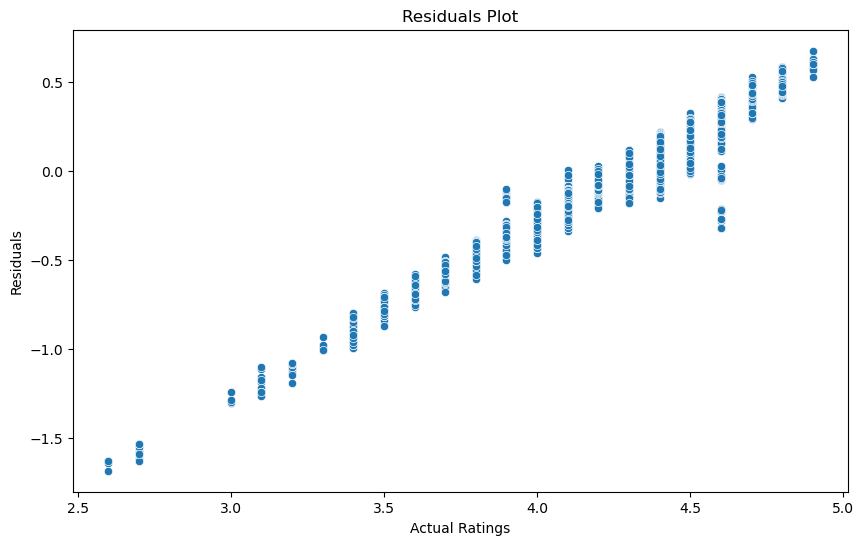

In [295]:
# Calculate residuals
residuals = y_test.values.flatten() - y_pred.flatten()

# Plot residuals
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test.values.flatten(), y=residuals)
plt.title('Residuals Plot')
plt.xlabel('Actual Ratings')
plt.ylabel('Residuals')
plt.show()


In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for Ridge regression
param_grid = {'alpha': [0.1, 1, 10, 100]}

# Create a Ridge regression model
ridge_model = Ridge()

# Use GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(ridge_model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_alpha = grid_search.best_params_['alpha']

# Train the model with the best hyperparameters
best_model = Ridge(alpha=best_alpha)
best_model.fit(X_train, y_train)


In [297]:
# Get the coefficients and intercept of the best model
coefficients = best_model.coef_
intercept = best_model.intercept_

# Display the coefficients and intercept
print("Intercept:", intercept)
print("Coefficients:")
for feature, coef in zip(X.columns, coefficients):
    print(f"{feature}: {coef}")


Intercept: [4.18050521]
Coefficients:
Reviews: [ 1.08561993e-08  1.61077913e-09 -2.22327025e-10  1.12628456e-01
 -9.56425300e-03  1.54713261e-02  5.47961823e-02  6.11145791e-02]
